In [1]:
import itertools as it
import matplotlib.pyplot as plt
load("utils.sage")

In [2]:
x,y = var("x,y")

In [3]:
R.<r,p> = QQ[]
F = R.fraction_field()

### Star absorption

In [4]:
%%time
N = 8

states = list(it.product((0,1), range(N)))
istates = { s:i for i,s in enumerate(states) }

Pmor = matrix(F, [[0]* len(states)] * len(states))
Pbin = matrix(F, [[0]* len(states)] * len(states))
Pber = matrix(F, [[0]* len(states)] * len(states))

Pmor[0,0] = Pbin[0,0] = Pber[0,0] = 1
Pmor[len(states)-1, len(states)-1] = Pbin[len(states)-1, len(states)-1] = Pber[len(states)-1, len(states)-1] = 1

for i in range(N):
    # null center
    if i != 0:
        Pmor[istates[(0,i)],istates[(1,i)]] = r*i / (r*i + N-i)
        Pber[istates[(0,i)],istates[(1,i)]] = r*i / (r*i + N-i) * p
        Pbin[istates[(0,i)],istates[(1,i)]] = r*i / (r*i + N-i) * p

        Pmor[istates[(0,i)],istates[(0,i-1)]] = 1 / (r*i + N-i) * i / (N-1)
        Pber[istates[(0,i)],istates[(0,i-1)]] = 1 / (r*i + N-i) * i / (N-1)
        Pbin[istates[(0,i)],istates[(0,i-1)]] = 1 / (r*i + N-i) * i / (N-1)
        
        Pmor[istates[(0,i)],istates[(0,i)]] = 1 - sum(Pmor.row(istates[(0,i)]))
        Pber[istates[(0,i)],istates[(0,i)]] = 1 - sum(Pber.row(istates[(0,i)]))
        Pbin[istates[(0,i)],istates[(0,i)]] = 1 - sum(Pbin.row(istates[(0,i)]))
        
    
    if i != N-1:
        Pmor[istates[(1,i)],istates[(1,i+1)]] = r / (r*(i+1) + N-i-1) * (N-1-i) / (N-1)
        Pber[istates[(1,i)],istates[(1,N-1)]] = r / (r*(i+1) + N-i-1) * p
        for k in [1..N-i-1]:
            Pbin[istates[(1,i)],istates[(1,i+k)]] = r / (r*(i+1) + N-i-1) * binomial(N-i-1, k) * p**k * (1-p)**(N-i-1 - k)

        Pmor[istates[(1,i)],istates[(0,i)]] = (N-i-1) / (r*(i+1) + N-i-1)
        Pber[istates[(1,i)],istates[(0,i)]] = (N-i-1) / (r*(i+1) + N-i-1)
        Pbin[istates[(1,i)],istates[(0,i)]] = (N-i-1) / (r*(i+1) + N-i-1)
        
        Pmor[istates[(1,i)],istates[(1,i)]] = 1 - sum(Pmor.row(istates[(1,i)]))
        Pber[istates[(1,i)],istates[(1,i)]] = 1 - sum(Pber.row(istates[(1,i)]))
        Pbin[istates[(1,i)],istates[(1,i)]] = 1 - sum(Pbin.row(istates[(1,i)]))


# Simplifications... I have not managed to do it in a reasonable way.. 
Pmor = Pmor.change_ring(SR).change_ring(F)
Pber = Pber.change_ring(SR).change_ring(F)
Pbin = Pbin.change_ring(SR).change_ring(F)

Qmor = identity_matrix(len(states)-2) - Pmor[1:-1,1:-1]
Qbin = identity_matrix(len(states)-2) - Pbin[1:-1,1:-1]
Qber = identity_matrix(len(states)-2) - Pber[1:-1,1:-1]

Phimor = Qmor.solve_right(vector(Pmor[1:-1,-1]))
Phibin = Qbin.solve_right(vector(Pbin[1:-1,-1]))
Phiber = Qber.solve_right(vector(Pber[1:-1,-1]))


# Simplifications... I have not managed to do it in a reasonable way
Phimor = Phimor.change_ring(SR).change_ring(F)
Phibin = Phibin.change_ring(SR).change_ring(F)
Phiber = Phiber.change_ring(SR).change_ring(F)

TimeBin = Qbin.solve_right(vector([1]*(len(states)-2)))
TimeBin = TimeBin.change_ring(SR).change_ring(F)

TimeBer = Qber.solve_right(vector([1]*(len(states)-2)))
TimeBer = TimeBer.change_ring(SR).change_ring(F)

TimeMor = Qmor.solve_right(vector([1]*(len(states)-2)))
TimeMor = TimeMor.change_ring(SR).change_ring(F)

# Conditionated times
PmorF = copy(Pmor)
PberF = copy(Pber)
PbinF = copy(Pbin)

for i in range(1,len(states)-1):
    PmorF.rescale_col(i, Phimor[i-1])
    PmorF.rescale_row(i, 1/Phimor[i-1])
    
    PberF.rescale_col(i, Phiber[i-1])
    PberF.rescale_row(i, 1/Phiber[i-1])
    
    PbinF.rescale_col(i, Phibin[i-1])
    PbinF.rescale_row(i, 1/Phibin[i-1])

QmorF = identity_matrix(len(states)-2) - PmorF[1:-1,1:-1]
QbinF = identity_matrix(len(states)-2) - PbinF[1:-1,1:-1]
QberF = identity_matrix(len(states)-2) - PberF[1:-1,1:-1]
    
TimeBinF = QbinF.solve_right(vector([1]*(len(states)-2)))
TimeBinF = TimeBinF.change_ring(SR).change_ring(F)

TimeBerF = QberF.solve_right(vector([1]*(len(states)-2)))
TimeBerF = TimeBerF.change_ring(SR).change_ring(F)

TimeMorF = QmorF.solve_right(vector([1]*(len(states)-2)))
TimeMorF = TimeMorF.change_ring(SR).change_ring(F)

#TimeMorNF = ((TimeMor - Phimor[0] * TimeMorF) / (1 - Phimor[0])).change_ring(SR).change_ring(F)
#TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
#TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

CPU times: user 10.3 s, sys: 34.5 ms, total: 10.3 s
Wall time: 10.4 s


In [5]:
MeanTimeBin = 1/N * TimeBin[istates[(1,0)]-1] + (N-1)/N * TimeBin[istates[(0,1)]-1]
MeanTimeBer = 1/N * TimeBer[istates[(1,0)]-1] + (N-1)/N * TimeBer[istates[(0,1)]-1]
MeanTimeMor = 1/N * TimeMor[istates[(1,0)]-1] + (N-1)/N * TimeMor[istates[(0,1)]-1]

MeanTimeBinF = 1/N * TimeBinF[istates[(1,0)]-1] + (N-1)/N * TimeBinF[istates[(0,1)]-1]
MeanTimeBerF = 1/N * TimeBerF[istates[(1,0)]-1] + (N-1)/N * TimeBerF[istates[(0,1)]-1]
MeanTimeMorF = 1/N * TimeMorF[istates[(1,0)]-1] + (N-1)/N * TimeMorF[istates[(0,1)]-1]

meanPhimor = 1/N * Phimor[istates[(1,0)]-1] + (N-1)/N * Phimor[istates[(0,1)]-1]
MeanTimeMorNF = ((MeanTimeMor - meanPhimor * MeanTimeMorF) / (1 - meanPhimor))#.change_ring(SR).change_ring(F)

meanPhibin = 1/N * Phibin[istates[(1,0)]-1] + (N-1)/N * Phibin[istates[(0,1)]-1]
MeanTimeBinNF = ((MeanTimeBin - meanPhibin * MeanTimeBinF) / (1 - meanPhibin))#.change_ring(SR).change_ring(F)

meanPhiber = 1/N * Phiber[istates[(1,0)]-1] + (N-1)/N * Phiber[istates[(0,1)]-1]
MeanTimeBerNF = ((MeanTimeBer - meanPhiber * MeanTimeBerF) / (1 - meanPhiber))#.change_ring(SR).change_ring(F)

MeanTimeBer = F(SR(MeanTimeBer))
MeanTimeBerF = F(SR(MeanTimeBerF))
MeanTimeBerNF = F(SR(MeanTimeBerNF))

MeanTimeBin = F(SR(MeanTimeBin))
MeanTimeBinF = F(SR(MeanTimeBinF))
MeanTimeBinNF = F(SR(MeanTimeBinNF))

MeanTimeMor = F(SR(MeanTimeMor))
MeanTimeMorF = F(SR(MeanTimeMorF))
MeanTimeMorNF = F(SR(MeanTimeMorNF))

                 #TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
#TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

In [22]:
QQ(0.000000000001)

1/1000000000000

In [59]:
def plotea(f):
    return lambda r,p : log(RDF(f(r=QQ(r), p=QQ(p))))

In [60]:
maxr = 4
plot3d(plotea(MeanTimeBinF), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(MeanTimeMorF), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(MeanTimeBerF), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(MeanTimeBinF)(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(MeanTimeBerF)(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [63]:
plot3d(log(MeanTimeBinNF), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(MeanTimeMorNF), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(MeanTimeBerNF), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(MeanTimeBinNF)(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(MeanTimeBerNF)(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [62]:
plot3d(plotea(MeanTimeBinNF), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(MeanTimeMorNF), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(MeanTimeBerNF), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(MeanTimeBinNF)(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(MeanTimeBerNF)(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [61]:
plot3d(log(MeanTimeBin), (r,0,maxr), (p,0,1), color="orange") + \
    plot3d(log(MeanTimeMor), (r,0,maxr), (p,0,1), color="blue") + \
        plot3d(log(MeanTimeBer), (r,0,maxr), (p,0,1), color="red") + \
            list_plot([ (b,a,log(MeanTimeBin)(p=a,r=b)) for a,b in zip(pcsbin,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8) + \
                list_plot([ (b,a,log(MeanTimeBer)(p=a,r=b)) for a,b in zip(pcsber,rs) if b<=maxr ], color="black", plotjoined=True, thickness=8)

Graphics3d Object

In [6]:
rs = [0,1/10+1/80..2/10]
rs.extend([2/10,2/10+1/40..1][1:-1])
rs.extend([1,1+1/10..10])
pcsbin = []
pcsber = []
tmpbin = (meanPhibin - meanPhimor)
tmpber = (meanPhiber - meanPhimor)
for valr in rs:
    if valr == 0:
        pcsbin.append(0)
        pcsber.append(0)
    else:
        pcsbin.append(pc(tmpbin.numerator().subs(r=valr)))
        pcsber.append(pc(tmpber.numerator().subs(r=valr)))
    

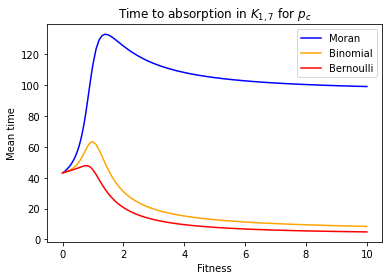

In [71]:
plt.plot(rs, [MeanTimeMor(r=valr) for valr in rs], c="blue", label="Moran")
plt.plot(rs, [MeanTimeBin(r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [MeanTimeBer(r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.title(f"Time to absorption in $K_{{1,{N-1}}}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"k1_{N-1}_absorption.pdf")

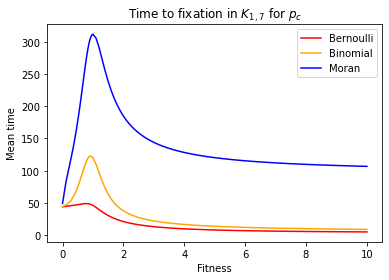

In [72]:
plt.plot(rs, [MeanTimeBerF(r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [MeanTimeBinF(r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [MeanTimeMorF(r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to fixation in $K_{{1,{N-1}}}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"k1_{N-1}_fixation.pdf")

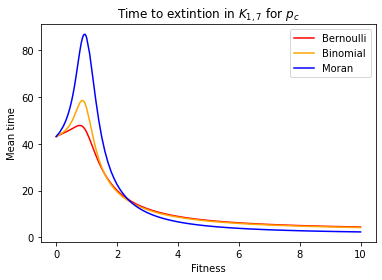

In [73]:
plt.plot(rs, [MeanTimeBerNF(r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [MeanTimeBinNF(r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [MeanTimeMorNF(r=valr) for valr in rs], c="blue", label="Moran")
plt.title(f"Time to extintion in $K_{{1,{N-1}}}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend()
plt.savefig(f"k1_{N-1}_extintion.pdf")

### Near 1

In [34]:
%%time
N = 8

states = list(it.product((0,1), range(N)))
istates = { s:i for i,s in enumerate(states) }

Pmor = matrix(F, [[0]* len(states)] * len(states))
Pbin = matrix(F, [[0]* len(states)] * len(states))
Pber = matrix(F, [[0]* len(states)] * len(states))

Pmor[0,0] = Pbin[0,0] = Pber[0,0] = 1
Pmor[len(states)-1, len(states)-1] = Pbin[len(states)-1, len(states)-1] = Pber[len(states)-1, len(states)-1] = 1

for i in range(N):
    # null center
    if i != 0:
        Pmor[istates[(0,i)],istates[(1,i)]] = r*i / (r*i + N-i)
        Pber[istates[(0,i)],istates[(1,i)]] = r*i / (r*i + N-i) * p
        Pbin[istates[(0,i)],istates[(1,i)]] = r*i / (r*i + N-i) * p

        Pmor[istates[(0,i)],istates[(0,i-1)]] = 1 / (r*i + N-i) * i / (N-1)
        Pber[istates[(0,i)],istates[(0,i-1)]] = 1 / (r*i + N-i) * i / (N-1)
        Pbin[istates[(0,i)],istates[(0,i-1)]] = 1 / (r*i + N-i) * i / (N-1)
        
        Pmor[istates[(0,i)],istates[(0,i)]] = 1 - sum(Pmor.row(istates[(0,i)]))
        Pber[istates[(0,i)],istates[(0,i)]] = 1 - sum(Pber.row(istates[(0,i)]))
        Pbin[istates[(0,i)],istates[(0,i)]] = 1 - sum(Pbin.row(istates[(0,i)]))
        
    
    if i != N-1:
        Pmor[istates[(1,i)],istates[(1,i+1)]] = r / (r*(i+1) + N-i-1) * (N-1-i) / (N-1)
        Pber[istates[(1,i)],istates[(1,N-1)]] = r / (r*(i+1) + N-i-1) * p
        for k in [1..N-i-1]:
            Pbin[istates[(1,i)],istates[(1,i+k)]] = r / (r*(i+1) + N-i-1) * binomial(N-i-1, k) * p**k * (1-p)**(N-i-1 - k)

        Pmor[istates[(1,i)],istates[(0,i)]] = (N-i-1) / (r*(i+1) + N-i-1)
        Pber[istates[(1,i)],istates[(0,i)]] = (N-i-1) / (r*(i+1) + N-i-1)
        Pbin[istates[(1,i)],istates[(0,i)]] = (N-i-1) / (r*(i+1) + N-i-1)
        
        Pmor[istates[(1,i)],istates[(1,i)]] = 1 - sum(Pmor.row(istates[(1,i)]))
        Pber[istates[(1,i)],istates[(1,i)]] = 1 - sum(Pber.row(istates[(1,i)]))
        Pbin[istates[(1,i)],istates[(1,i)]] = 1 - sum(Pbin.row(istates[(1,i)]))


# Simplifications... I have not managed to do it in a reasonable way.. 
Pmor = Pmor.change_ring(SR).change_ring(F)
Pber = Pber.change_ring(SR).change_ring(F)
Pbin = Pbin.change_ring(SR).change_ring(F)

Qmor = identity_matrix(len(states)-2) - Pmor[1:-1,1:-1]
Qbin = identity_matrix(len(states)-2) - Pbin[1:-1,1:-1]
Qber = identity_matrix(len(states)-2) - Pber[1:-1,1:-1]

Phimor = Qmor.solve_right(vector(Pmor[1:-1,-1]))
Phibin = Qbin.solve_right(vector(Pbin[1:-1,-1]))
Phiber = Qber.solve_right(vector(Pber[1:-1,-1]))


# Simplifications... I have not managed to do it in a reasonable way
Phimor = Phimor.change_ring(SR).change_ring(F)
Phibin = Phibin.change_ring(SR).change_ring(F)
Phiber = Phiber.change_ring(SR).change_ring(F)

TimeBin = Qbin.solve_right(vector([1]*(len(states)-2)))
TimeBin = TimeBin.change_ring(SR).change_ring(F)

TimeBer = Qber.solve_right(vector([1]*(len(states)-2)))
TimeBer = TimeBer.change_ring(SR).change_ring(F)

TimeMor = Qmor.solve_right(vector([1]*(len(states)-2)))
TimeMor = TimeMor.change_ring(SR).change_ring(F)

# Conditionated times
PmorF = copy(Pmor)
PberF = copy(Pber)
PbinF = copy(Pbin)

for i in range(1,len(states)-1):
    PmorF.rescale_col(i, Phimor[i-1])
    PmorF.rescale_row(i, 1/Phimor[i-1])
    
    PberF.rescale_col(i, Phiber[i-1])
    PberF.rescale_row(i, 1/Phiber[i-1])
    
    PbinF.rescale_col(i, Phibin[i-1])
    PbinF.rescale_row(i, 1/Phibin[i-1])

QmorF = identity_matrix(len(states)-2) - PmorF[1:-1,1:-1]
QbinF = identity_matrix(len(states)-2) - PbinF[1:-1,1:-1]
QberF = identity_matrix(len(states)-2) - PberF[1:-1,1:-1]
    
TimeBinF = QbinF.solve_right(vector([1]*(len(states)-2)))
TimeBinF = TimeBinF.change_ring(SR).change_ring(F)

TimeBerF = QberF.solve_right(vector([1]*(len(states)-2)))
TimeBerF = TimeBerF.change_ring(SR).change_ring(F)

TimeMorF = QmorF.solve_right(vector([1]*(len(states)-2)))
TimeMorF = TimeMorF.change_ring(SR).change_ring(F)

#TimeMorNF = ((TimeMor - Phimor[0] * TimeMorF) / (1 - Phimor[0])).change_ring(SR).change_ring(F)
#TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
#TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

MeanTimeBin = 1/N * TimeBin[istates[(1,0)]-1] + (N-1)/N * TimeBin[istates[(0,1)]-1]
MeanTimeBer = 1/N * TimeBer[istates[(1,0)]-1] + (N-1)/N * TimeBer[istates[(0,1)]-1]
MeanTimeMor = 1/N * TimeMor[istates[(1,0)]-1] + (N-1)/N * TimeMor[istates[(0,1)]-1]

MeanTimeBinF = 1/N * TimeBinF[istates[(1,0)]-1] + (N-1)/N * TimeBinF[istates[(0,1)]-1]
MeanTimeBerF = 1/N * TimeBerF[istates[(1,0)]-1] + (N-1)/N * TimeBerF[istates[(0,1)]-1]
MeanTimeMorF = 1/N * TimeMorF[istates[(1,0)]-1] + (N-1)/N * TimeMorF[istates[(0,1)]-1]

meanPhimor = 1/N * Phimor[istates[(1,0)]-1] + (N-1)/N * Phimor[istates[(0,1)]-1]
MeanTimeMorNF = ((MeanTimeMor - meanPhimor * MeanTimeMorF) / (1 - meanPhimor))#.change_ring(SR).change_ring(F)

meanPhibin = 1/N * Phibin[istates[(1,0)]-1] + (N-1)/N * Phibin[istates[(0,1)]-1]
MeanTimeBinNF = ((MeanTimeBin - meanPhibin * MeanTimeBinF) / (1 - meanPhibin))#.change_ring(SR).change_ring(F)

meanPhiber = 1/N * Phiber[istates[(1,0)]-1] + (N-1)/N * Phiber[istates[(0,1)]-1]
MeanTimeBerNF = ((MeanTimeBer - meanPhiber * MeanTimeBerF) / (1 - meanPhiber))#.change_ring(SR).change_ring(F)

MeanTimeBer = F(SR(MeanTimeBer))
MeanTimeBerF = F(SR(MeanTimeBerF))
MeanTimeBerNF = F(SR(MeanTimeBerNF))

MeanTimeBin = F(SR(MeanTimeBin))
MeanTimeBinF = F(SR(MeanTimeBinF))
MeanTimeBinNF = F(SR(MeanTimeBinNF))

MeanTimeMor = F(SR(MeanTimeMor))
MeanTimeMorF = F(SR(MeanTimeMorF))
MeanTimeMorNF = F(SR(MeanTimeMorNF))

                 #TimeBerNF = ((TimeBer - Phiber[0] * TimeBerF) / (1 - Phiber[0])).change_ring(SR).change_ring(F)
#TimeBinNF = ((TimeBin - Phibin[0] * TimeBinF) / (1 - Phibin[0])).change_ring(SR).change_ring(F)

CPU times: user 14.1 s, sys: 19.9 ms, total: 14.1 s
Wall time: 14.1 s


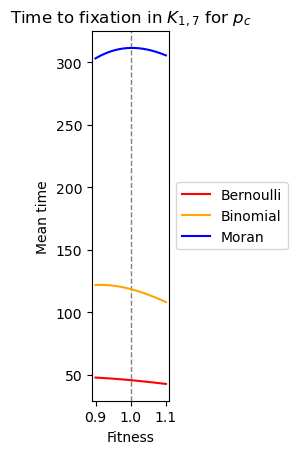

In [35]:
rs = [9/10,9/10+1/800..11/10]
pcsbin = []
pcsber = []
tmpbin = (Phibin[0] - Phimor[0])
tmpber = (Phiber[0] - Phimor[0])
for valr in rs:
    if valr == 0:
        pcsbin.append(0)
        pcsber.append(0)
    else:
        pcsbin.append(pc(tmpbin.numerator().subs(r=valr)))
        pcsber.append(pc(tmpber.numerator().subs(r=valr)))


plt.figure().set_figwidth(1)
plt.plot(rs, [MeanTimeBerF(r=valr, p=valp) for valr,valp in zip(rs,pcsber)], c="red", label="Bernoulli")
plt.plot(rs, [MeanTimeBinF(r=valr, p=valp) for valr,valp in zip(rs,pcsbin)], c="orange", label="Binomial")
plt.plot(rs, [MeanTimeMorF(r=valr) for valr in rs], c="blue", label="Moran")
ylim = plt.ylim()
plt.plot([1,1], ylim, '--', zorder=0, c="gray", linewidth=1)
plt.ylim(ylim)
plt.title(f"Time to fixation in $K_{{1,{N-1}}}$ for $p_c$")
plt.xlabel("Fitness")
plt.ylabel("Mean time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(f"k{1,N-1}_fixation_zoom.pdf", bbox_inches="tight")